In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
# Step 1: Generate synthetic weather data for Bangalore in 2025 (temperature in Celsius)
dates = pd.date_range('2025-01-01', '2025-12-31', freq='D')
np.random.seed(0)
temperature = np.random.normal(25, 5, len(dates))

In [71]:
# Introduce missing values (simulating some data loss)
missing_percentage = 0.1  # 10% missing data
missing_indices = np.random.choice(len(dates), int(missing_percentage * len(dates)), replace=False)
temperature[missing_indices] = np.nan

In [72]:
# Introduce missing values (simulating some data loss)
missing_percentage = 0.1  # 10% missing data
missing_indices = np.random.choice(len(dates), int(missing_percentage * len(dates)), replace=False)
temperature[missing_indices] = np.nan

In [73]:
# Create DataFrame
weather_data = pd.DataFrame({'Date': dates, 'Temperature': temperature})
weather_data.set_index('Date', inplace=True)

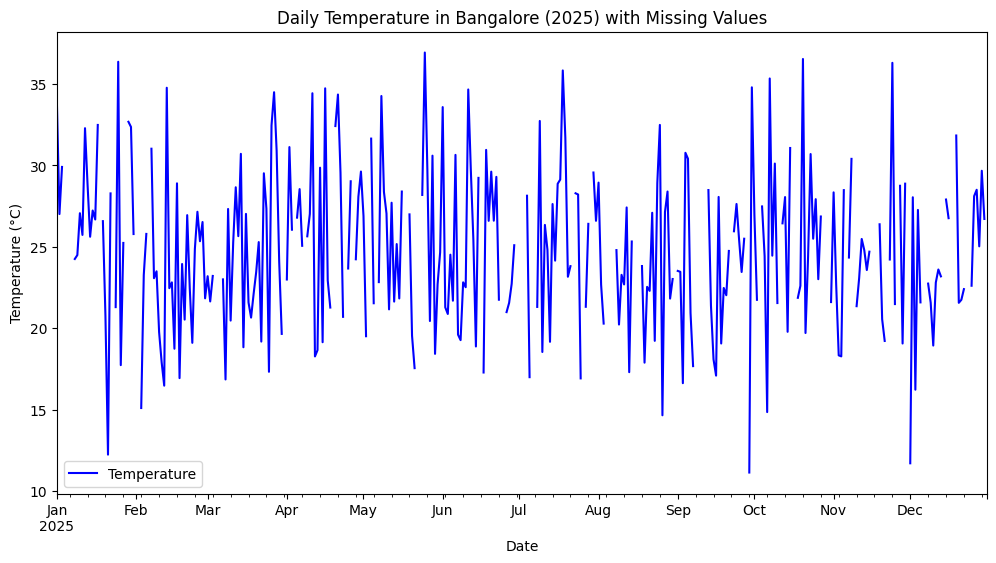

In [74]:
# Step 2: Visualize the data with missing values
plt.figure(figsize=(12, 6))
weather_data['Temperature'].plot(label='Temperature', color='b')
plt.title('Daily Temperature in Bangalore (2025) with Missing Values')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [77]:
# Option 1: Interpolation (linear)
weather_data['Temperature_interp'] = weather_data['Temperature'].interpolate(method='linear')

In [81]:
# Option 2: Fill missing values with forward fill (carry previous value)
weather_data['Temperature_ffill'] = weather_data['Temperature'].ffill()


In [82]:
# Option 3: Impute missing values with the mean temperature
mean_temperature = weather_data['Temperature'].mean()
weather_data['Temperature_mean'] = weather_data['Temperature'].fillna(mean_temperature)

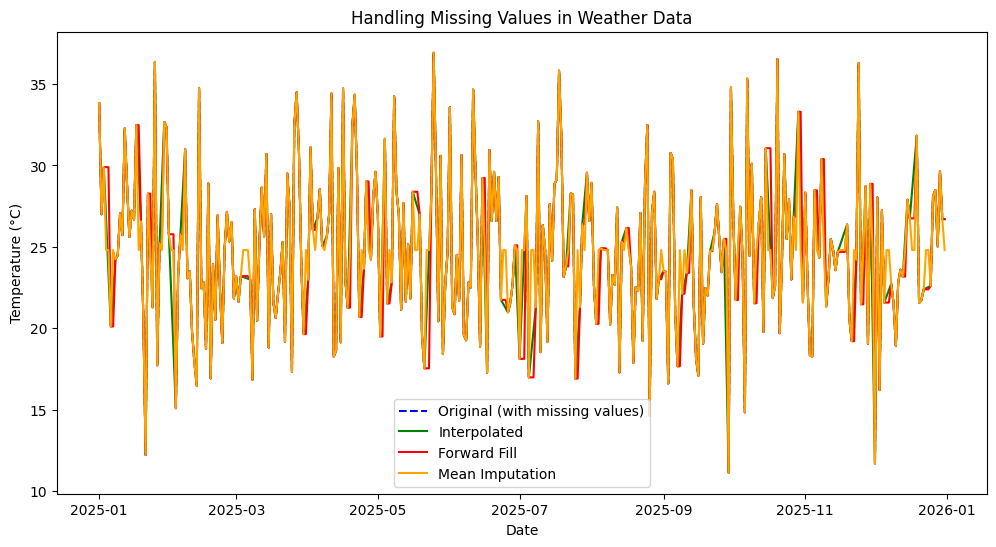

In [83]:
# Step 4: Visualize the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['Temperature'], label='Original (with missing values)', color='b', linestyle='--')
plt.plot(weather_data.index, weather_data['Temperature_interp'], label='Interpolated', color='g')
plt.plot(weather_data.index, weather_data['Temperature_ffill'], label='Forward Fill', color='r')
plt.plot(weather_data.index, weather_data['Temperature_mean'], label='Mean Imputation', color='orange')
plt.title('Handling Missing Values in Weather Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [84]:
# Step 5: Train a simple model (Linear Regression) to predict temperature
# Use the date index as a numerical feature for the regression model
weather_data['Date_num'] = (weather_data.index - weather_data.index.min()).days

In [85]:
# Train-test split
X = weather_data[['Date_num']].dropna()  # Feature: days since the start of the year
y = weather_data['Temperature_interp'].dropna()  # Target: interpolated temperatures

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
import numpy as np

# Step 6: Predict future temperatures
future_dates = pd.date_range('2025-12-31', '2026-01-10', freq='D')
# Calculate the number of days from the first date in the dataset
future_dates_num = (future_dates - weather_data.index.min()).days.to_numpy().reshape(-1, 1)

# You can now proceed with the prediction using the future_dates_num


In [93]:
# Convert future_dates_num to a DataFrame with the same column name as the training data
future_dates_num_df = pd.DataFrame(future_dates_num, columns=['Date_num'])

# Now, predict using the model
predictions = model.predict(future_dates_num_df)


In [94]:
# Option 3: Impute missing values with the mean temperature
mean_temperature = weather_data['Temperature'].mean()
weather_data['Temperature_mean'] = weather_data['Temperature'].fillna(mean_temperature)


In [96]:
# Step 5: Train a simple model (Linear Regression) to predict temperature
# Use the date index as a numerical feature for the regression model
weather_data['Date_num'] = (weather_data.index - weather_data.index.min()).days

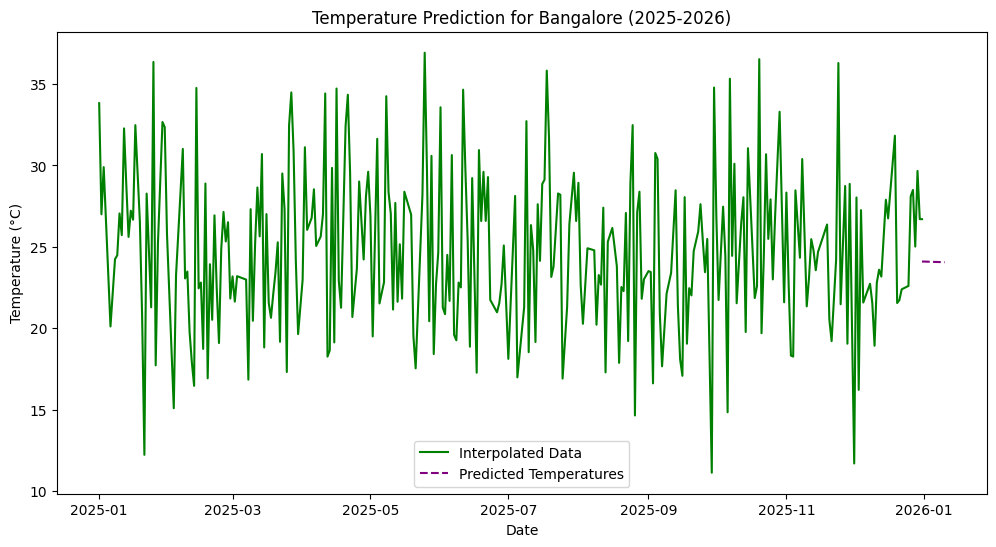

In [101]:
# Step 7: Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['Temperature_interp'], label='Interpolated Data', color='g')
plt.plot(future_dates, predictions, label='Predicted Temperatures', color='purple', linestyle='--')
plt.title('Temperature Prediction for Bangalore (2025-2026)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [102]:
# Print out predictions
predicted_data = pd.DataFrame({'Date': future_dates, 'Predicted Temperature': predictions})
print(predicted_data)

         Date  Predicted Temperature
0  2025-12-31              24.100948
1  2026-01-01              24.096544
2  2026-01-02              24.092140
3  2026-01-03              24.087735
4  2026-01-04              24.083331
5  2026-01-05              24.078927
6  2026-01-06              24.074523
7  2026-01-07              24.070118
8  2026-01-08              24.065714
9  2026-01-09              24.061310
10 2026-01-10              24.056906


In [112]:
import random
random.seed(42)
print(random.randint(1, 10))  


2
